In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import sqrt

from PIL import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

## A Deep Dive into NBA game with Data Science

### Data science plays a crucial role in various fields. As an NBA enthusiast, I've observed a significant shift towards data-driven approaches in game strategies, team management, and draft picks. In my final project, I am assuming the role of a data scientist working for the LA Lakers. The Lakers' General Manager (GM) has tasked me with uncovering valuable insights. I will present findings derived from data science methods and machine learning techniques to provide a comprehensive analysis for decision-making.

### Here are the questions from GM:
* Use data science to assess player performance and optimize contract valuations for the LA Lakers, with the aim of identifying undervalued and overvalued players? 
* Furthermore, Provide suggestion to make contract adjustments over the upcoming years to enhance the team's overall performance and financial efficiency?

## A Key index: Player's Efficiency Rating (PER)
### Introduction
PER is an index that attempts to combine all of a player's contributions into one number, that includes positive accomplishments such as field goals, free throws, 3-pointers, assists, rebounds, blocks and steals, and negative ones such as missed shots, turnovers and personal fouls. In conclusion, PER can summarize a player's statistical accomplishments in a single number. 

### Background on Player Efficiency Rating (referenced from Wikipedia.org)
John Hollinger (born May 17, 1971) is the former Vice President of Basketball Operations for the Memphis Grizzlies of the National Basketball Association (NBA) and current Senior NBA columnist at The Athletic.
Hollinger spent the next three years as the sports editor at OregonLive.com, developing an intimate understanding of the inner workings of the NBA, both as a game and a business. It was during his OregonLive years that Hollinger developed his Player Efficiency Rating (PER). 

The complete version of the PER formula is quite complex. A simpler version of PER formula is: <span style="color:green">
PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF – TOV. </span>

"To generate PER, I created formulas -- outlined in tortuous detail in my book "Pro Basketball Forecast" -- that return a value for each of a player's accomplishments. That includes positive accomplishments such as field goals, free throws, 3-pointers, assists, rebounds, blocks and steals, and negative ones such as missed shots, turnovers and personal fouls." --John Hollinger

### PART I: Assess The Performance of Players Using PER Index

In [2]:
# In Part I, the key is to train a model for predicting the PER
# import 2 datasets: 1. Base stats (have all the features I need) and 2. Advanced stats (have the target variable: PER)

### Base Stats: Data Extraction, Data Cleaning and EDA
prepare data for player's base stats

In [3]:
df_base=pd.read_csv('regular_base_data.csv')
df_base.shape

(539, 31)

In [4]:
df_base.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')

In [5]:
# the data need to be cleaned
df_base.head(10) 

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,aldamsa01
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,...,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2,alexani01
6,7,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,...,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4,allengr01
7,8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,...,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3,allenja01
8,9,Jose Alvarado,PG,24,NOP,61,10,21.5,3.3,8.0,...,0.5,1.9,2.3,3.0,1.1,0.2,1.3,2.0,9.0,alvarjo01
9,10,Kyle Anderson,PF,29,MIN,69,46,28.4,3.7,7.2,...,1.0,4.4,5.3,4.9,1.1,0.9,1.5,2.1,9.4,anderky01


In [6]:
# drop the 'Player-additional' column
df_base=df_base.drop(columns=['Player-additional'])

In [7]:
# see rows that contains NaN
df_base.isna().any(axis=1).sum()

37

In [8]:
# fill NaN with 0
df_base=df_base.fillna(0)

In [9]:
df_base.isna().any(axis=1).sum()

0

In [10]:
df_base.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


### Advanced Stats: Data Extraction, Data Cleaning and EDA
prepare data for player's advanced stats

In [11]:
df_adv=pd.read_csv('regular_adv_data.csv')
df_adv.shape

(539, 30)

In [12]:
df_adv.columns # in the df_adv, I will focus on the PER column. 

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Player-additional'],
      dtype='object')

In [13]:
df_adv.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,1140,15.2,0.554,0.267,...,0.8,1.4,2.2,0.093,NaN,-1.4,-0.8,-2.3,-0.1,achiupr01
1,2,Steven Adams,C,29,MEM,42,1133,17.5,0.564,0.004,...,1.3,2.1,3.4,0.144,NaN,-0.3,0.9,0.6,0.7,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,2598,20.1,0.592,0.011,...,3.6,3.8,7.4,0.137,NaN,0.8,0.8,1.5,2.3,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,1209,9.5,0.561,0.591,...,0.9,0.4,1.3,0.053,NaN,-1.7,-1.4,-3.0,-0.3,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,1682,13.9,0.591,0.507,...,2.1,2.4,4.6,0.130,NaN,-0.3,0.8,0.5,1.1,aldamsa01


In [14]:
df_adv.isna().any(axis=1).sum()

539

In [15]:
df_adv=df_adv.drop(columns=['Player-additional', 'Unnamed: 19', 'Unnamed: 24'])

In [16]:
df_adv.isna().any(axis=1).sum()

2

In [17]:
df_adv=df_adv.fillna(0)

In [18]:
df_adv.isna().any(axis=1).sum()

0

In [19]:
df_adv.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,23,TOR,55,1140,15.2,0.554,0.267,...,11.4,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1
1,2,Steven Adams,C,29,MEM,42,1133,17.5,0.564,0.004,...,19.8,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7
2,3,Bam Adebayo,C,25,MIA,75,2598,20.1,0.592,0.011,...,12.7,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3
3,4,Ochai Agbaji,SG,22,UTA,59,1209,9.5,0.561,0.591,...,9.0,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3
4,5,Santi Aldama,PF,22,MEM,77,1682,13.9,0.591,0.507,...,9.3,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1


### Merge and Feature Selection
Creat a new dataset that combines player's base stats and advanced stats

In [20]:
#Merge df_base and df_adv to create a new df with selected features
df_per_tracker=pd.merge(df_base[['Player', 'G', 'MP', 'PTS', 'FG', 'FGA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 
                                 'TOV', 'PF']],
                        df_adv[['Player','PER']], on='Player')
df_per_tracker.head()
# The selected features are: 
# G : Games played
# MP : Minutes played per game
# PTS : Points per game
# FG : Field goals per game
# FGA : Field goal attempts per game
# FT : Free throws per game
# FTA : Free throw attempts per game
# ORB : Offensive rebounds per game
# DRB : Defensive rebounds per game
# AST : Assists per game
# STL : Steals per game
# BLK : Blocks per game
# TOV : Turnovers per game
# PF : Personal fouls per game 
# PER : Player Efficiency Rating

,Player,G,MP,PTS,FG,FGA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PER
0,Precious Achiuwa,55,20.7,9.2,3.6,7.3,1.6,2.3,1.8,4.1,0.9,0.6,0.5,1.1,1.9,15.2
1,Steven Adams,42,27.0,8.6,3.7,6.3,1.1,3.1,5.1,6.5,2.3,0.9,1.1,1.9,2.3,17.5
2,Bam Adebayo,75,34.6,20.4,8.0,14.9,4.3,5.4,2.5,6.7,3.2,1.2,0.8,2.5,2.8,20.1
3,Ochai Agbaji,59,20.5,7.9,2.8,6.5,0.9,1.2,0.7,1.3,1.1,0.3,0.3,0.7,1.7,9.5
4,Santi Aldama,77,21.8,9.0,3.2,6.8,1.4,1.9,1.1,3.7,1.3,0.6,0.6,0.8,1.9,13.9


In [21]:
df_per_tracker.fillna(0, inplace=True)

In [22]:
df_per_tracker.isna().any(axis=1).sum()

0

In [23]:
df_per_tracker.sort_values(by=['PER'], ascending=False)[:20] 
# Noticed that the 1st and 2nd Highest PER players played LESS THAN 5 games...
# As a rule of thumb, for qualification in this project, a player must have played at least 8 games (10%) in a 82-game season.
# Otherwise, the player will be excluded.

,Player,G,MP,PTS,FG,FGA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PER
481,Stanley Umude,1,2.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,65.6
125,Tyler Dorsey,3,2.7,3.0,1.3,1.7,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,45.5
248,Nikola Jokić,69,33.7,24.5,9.4,14.8,4.9,6.0,2.4,9.4,9.8,1.3,0.7,3.6,2.5,31.5
142,Joel Embiid,66,34.6,33.1,11.0,20.1,10.0,11.7,1.7,8.4,4.2,1.0,1.7,3.4,3.1,31.4
10,Giannis Antetokounmpo,63,32.1,31.1,11.2,20.3,7.9,12.3,2.2,9.6,5.7,0.8,0.8,3.9,3.1,29.0
124,Luka Dončić,66,36.2,32.4,10.9,22.0,7.8,10.5,0.8,7.8,8.0,1.4,0.5,3.6,2.5,28.7
109,Anthony Davis,56,34.0,25.9,9.7,17.2,6.2,7.9,3.5,9.1,2.6,1.1,2.0,2.2,2.6,27.8
74,Jimmy Butler,64,33.4,22.9,7.5,13.9,7.4,8.7,2.2,3.7,5.3,1.8,0.3,1.6,1.3,27.6
163,Shai Gilgeous-Alexander,68,35.5,31.4,10.4,20.3,9.8,10.9,0.9,4.0,5.5,1.6,1.0,2.8,2.8,27.2
291,Damian Lillard,58,36.3,32.2,9.6,20.7,8.8,9.6,0.8,4.0,7.3,0.9,0.3,3.3,1.9,26.7


In [24]:
# select qualified players and update df_per_tracker
df_per_tracker = df_per_tracker[df_per_tracker['G']>=8]
df_per_tracker

,Player,G,MP,PTS,FG,FGA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PER
0,Precious Achiuwa,55,20.7,9.2,3.6,7.3,1.6,2.3,1.8,4.1,0.9,0.6,0.5,1.1,1.9,15.2
1,Steven Adams,42,27.0,8.6,3.7,6.3,1.1,3.1,5.1,6.5,2.3,0.9,1.1,1.9,2.3,17.5
2,Bam Adebayo,75,34.6,20.4,8.0,14.9,4.3,5.4,2.5,6.7,3.2,1.2,0.8,2.5,2.8,20.1
3,Ochai Agbaji,59,20.5,7.9,2.8,6.5,0.9,1.2,0.7,1.3,1.1,0.3,0.3,0.7,1.7,9.5
4,Santi Aldama,77,21.8,9.0,3.2,6.8,1.4,1.9,1.1,3.7,1.3,0.6,0.6,0.8,1.9,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Thaddeus Young,54,14.7,4.4,2.0,3.7,0.3,0.5,1.3,1.8,1.4,1.0,0.1,0.8,1.6,14.1
535,Trae Young,73,34.8,26.2,8.2,19.0,7.8,8.8,0.8,2.2,10.2,1.1,0.1,4.1,1.4,22.0
536,Omer Yurtseven,9,9.2,4.4,1.8,3.0,0.6,0.7,0.9,1.7,0.2,0.2,0.2,0.4,1.8,16.7
537,Cody Zeller,15,14.5,6.5,2.5,3.9,1.6,2.3,1.7,2.6,0.7,0.2,0.3,0.9,2.2,16.4


In [25]:
# display the top 20 players based on PER. 
df_per_tracker.sort_values(by=['PER'], ascending=False)[:20] 

,Player,G,MP,PTS,FG,FGA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PER
248,Nikola Jokić,69,33.7,24.5,9.4,14.8,4.9,6.0,2.4,9.4,9.8,1.3,0.7,3.6,2.5,31.5
142,Joel Embiid,66,34.6,33.1,11.0,20.1,10.0,11.7,1.7,8.4,4.2,1.0,1.7,3.4,3.1,31.4
10,Giannis Antetokounmpo,63,32.1,31.1,11.2,20.3,7.9,12.3,2.2,9.6,5.7,0.8,0.8,3.9,3.1,29.0
124,Luka Dončić,66,36.2,32.4,10.9,22.0,7.8,10.5,0.8,7.8,8.0,1.4,0.5,3.6,2.5,28.7
109,Anthony Davis,56,34.0,25.9,9.7,17.2,6.2,7.9,3.5,9.1,2.6,1.1,2.0,2.2,2.6,27.8
74,Jimmy Butler,64,33.4,22.9,7.5,13.9,7.4,8.7,2.2,3.7,5.3,1.8,0.3,1.6,1.3,27.6
163,Shai Gilgeous-Alexander,68,35.5,31.4,10.4,20.3,9.8,10.9,0.9,4.0,5.5,1.6,1.0,2.8,2.8,27.2
291,Damian Lillard,58,36.3,32.2,9.6,20.7,8.8,9.6,0.8,4.0,7.3,0.9,0.3,3.3,1.9,26.7
136,Kevin Durant,47,35.6,29.1,10.3,18.3,6.5,7.1,0.4,6.3,5.0,0.7,1.4,3.3,2.1,25.9
526,Zion Williamson,29,33.0,26.0,9.8,16.2,6.1,8.6,2.0,5.0,4.6,1.1,0.6,3.4,2.2,25.2


### Developing A Model - PER Prediction Model 
train a model to predict player's PER

In [26]:
seed = 42

In [27]:
X = df_per_tracker[['MP', 'PTS', 'FG', 'FGA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]
y = df_per_tracker[['PER']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [29]:
print('rows in train:', X_train.shape[0], '\n', 'rows in test:', X_test.shape[0])

rows in train: 360 
 rows in test: 121


In [30]:
tree = DecisionTreeRegressor(max_depth=20)

In [31]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [32]:
#lr = LinearRegression()

In [33]:
#lr.fit(X_train, y_train)

In [34]:
# can use linear regression too, but the result is not as good as decision tree regressor 

### Testing the Model

In [35]:
y_test_pred = tree.predict(X_test)

In [36]:
MSE_test= mean_squared_error(y_true= y_test, y_pred= y_test_pred)
MSE_test

10.507603305785123

In [37]:
r2_test= r2_score(y_true= y_test, y_pred= y_test_pred)
r2_test

0.310261036925795

In [38]:
# 'MP', 'PTS', 'FG', 'FGA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF'

In [39]:
# This is Jordan's career base stats
X_jordan = np.array([[38.3, 30.1, 11.4, 22.9, 6.8, 8.2, 1.6,4.7,5.3,2.3,0.8,2.7,2.6]]) 
# Jordan's career PER is 27.9 
# per https://www.basketball-reference.com/players/j/jordami01.html

In [40]:
# This is Kobe's career base stats
X_kobe = np.array([[36.1,25.0,8.7, 19.5, 6.2,7.4, 1.1, 4.1,4.7,1.4,0.5,3.0,2.5 ]]) 
# Kobe's career PER is 22.9 
# per https://www.basketball-reference.com/players/b/bryanko01.html

In [41]:
# This is Lebron's career base stats
X_lebron = np.array([[38.0, 27.2, 9.9,19.7, 5.7, 7.7, 1.2, 6.3, 7.3,1.5,0.8,3.5,1.8]]) 
# Lebron's career PER is 27.2 
# per https://www.basketball-reference.com/players/j/jamesle01.html

In [42]:
jordan_prediction= tree.predict(X_jordan)
jordan_prediction # Jordan's predicted PER

C:\Users\ljw12\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([28.7])

In [43]:
kobe_prediction= tree.predict(X_kobe)
kobe_prediction # Kobe's predicted PER 

C:\Users\ljw12\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([20.3])

In [44]:
lebron_prediction= tree.predict(X_lebron)
lebron_prediction # Lebron's predicted PER

C:\Users\ljw12\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([22.9])

In [45]:
# Model accuracy is acceptable. 
# I will deploy this model later in Part III. 
# It will be used to predict the expected PER of Lakers players.

### Part II: Laker's Contract VS. Baseline

In [46]:
# In Part II, the key is to establish a baseline model for comparison with the contracts of Lakers players.
# import a new dataset, the contract $ amount for all the players in the league. 

### Contract data: Data Extraction, Data Cleaning and EDA
prepare data for player's contract

In [47]:
df_contract=pd.read_csv('contract.csv')
df_contract.head()

,Rk,Player,Tm,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29,Guaranteed,-9999
0,1,Stephen Curry,GSW,51915615.0,"$55,761,216","$59,606,817",NaN,NaN,NaN,"$167,283,648",curryst01
1,2,Kevin Durant,PHO,47649433.0,"$51,179,021","$54,708,609",NaN,NaN,NaN,"$153,537,063",duranke01
2,3,Nikola Jokić,DEN,47607350.0,"$51,415,938","$55,224,526","$59,033,114","$62,841,702",NaN,"$213,280,928",jokicni01
3,4,Joel Embiid,PHI,47607350.0,"$51,415,938","$55,224,526","$59,033,114",NaN,NaN,"$154,247,814",embiijo01
4,5,LeBron James,LAL,47607350.0,"$51,415,938",NaN,NaN,NaN,NaN,"$47,607,350",jamesle01


In [48]:
df_contract.columns

Index(['Rk', 'Player', 'Tm', '2023-24', '2024-25', '2025-26', '2026-27',
       '2027-28', '2028-29', 'Guaranteed', '-9999'],
      dtype='object')

In [49]:
# I only need to keep the current contract, which is the '2023-24' column.
df_contract=df_contract.drop(columns=['2024-25', '2025-26', '2026-27', '2027-28', '2028-29', 'Guaranteed', '-9999'])
df_contract.head()

,Rk,Player,Tm,2023-24
0,1,Stephen Curry,GSW,51915615.0
1,2,Kevin Durant,PHO,47649433.0
2,3,Nikola Jokić,DEN,47607350.0
3,4,Joel Embiid,PHI,47607350.0
4,5,LeBron James,LAL,47607350.0


In [50]:
df_contract.isna().any(axis=1).sum()

1

In [51]:
df_contract=df_contract.fillna(0)

In [52]:
df_contract.isna().any(axis=1).sum()

0

### Merge and Feature Selection
Creat a new dataset that combines player's contract $ amount and PER.

In [53]:
#Merge df_contract and df_per_tracker to create a new df with selected features
df_contract_per=pd.merge(df_contract[['Player','2023-24']], df_per_tracker[['Player','PER']], on='Player')
df_contract_per.head()

,Player,2023-24,PER
0,Stephen Curry,51915615.0,24.1
1,Kevin Durant,47649433.0,25.9
2,Nikola Jokić,47607350.0,31.5
3,Joel Embiid,47607350.0,31.4
4,LeBron James,47607350.0,23.9


In [54]:
# scale the contract $ amount into million. 
df_contract_per['2023-24']=df_contract_per['2023-24']/1000000
df_contract_per.head()

,Player,2023-24,PER
0,Stephen Curry,51.915615,24.1
1,Kevin Durant,47.649433,25.9
2,Nikola Jokić,47.607350,31.5
3,Joel Embiid,47.607350,31.4
4,LeBron James,47.607350,23.9


### Data visulization 

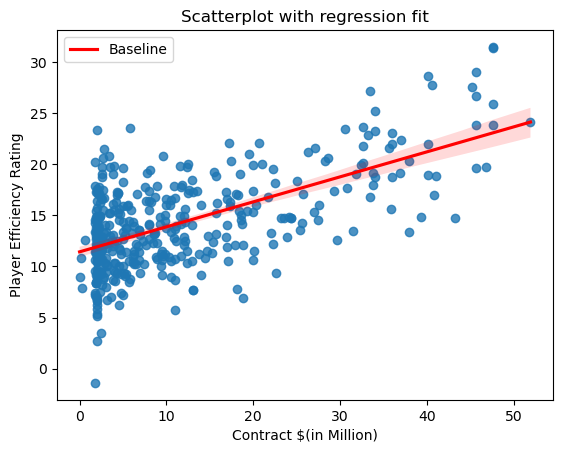

In [55]:
# Upon visual examination of the scatter plot, a linear regression appears to be a suitable fit. 
# I choose to use Seaborn's regplot. It not only provides a scatter plot but also displays a regression line.

sns.regplot(x=df_contract_per['2023-24'], y=df_contract_per['PER'], ci=95, line_kws={'color': 'red', 'label': 'Baseline'})

plt.title('Scatterplot with regression fit')
plt.xlabel('Contract $(in Million)')
plt.ylabel('Player Efficiency Rating')
plt.legend()
plt.show()


In [56]:
# Utilize the players' data across the entire league with the x-axis representing contract $ and the y-axis representing PER. 
# Fit a linear regression line to determine the slope and intercept point, establishing this as the baseline.
# Apply this baseline comparison model to the Lakers, identifying individuals who fall below and above the established baseline.


### Developing Another Model - Baseline Comparison Model

In [57]:
# Fit a linear regression line
lr = LinearRegression()
lr.fit(df_contract_per[['2023-24']], df_contract_per['PER'])

# Slope and intercept point
intercept = lr.intercept_
slope = lr.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)


Intercept: 11.434851287666401
Slope: 0.24480692109891433


In [58]:
# define a function where the input variable is PER, and the output value is the contract $ amount. 

def expected_contract(per):
    return (1/slope)*per-intercept/slope


In [59]:
# import a new df for Laker's current roster.
df_lakers=pd.read_csv('lakers.csv')
df_lakers

,No.,Player,Pos,Ht,Wt,Birth Date,Unnamed: 6,Exp,College
0,1,D'Angelo Russell,PG,6-3,193,February 23 1996,us,8,Ohio State
1,15,Austin Reaves,SG,6-5,206,May 29 1998,us,2,Wichita State Oklahoma
2,35,Christian Wood,PF,6-8,214,September 27 1995,us,7,UNLV
3,23,LeBron James,PF,6-9,250,December 30 1984,us,20,NaN
4,3,Anthony Davis,C,6-10,253,March 11 1993,us,11,Kentucky
5,12,Taurean Prince,PF,6-6,218,March 22 1994,us,7,Baylor
6,11,Jaxson Hayes,C,7-0,220,May 23 2000,us,4,Texas
7,5,Cam Reddish,SF,6-8,218,September 1 1999,us,4,Duke
8,10,Max Christie,SG,6-6,190,February 10 2003,us,1,Michigan State
9,28,Rui Hachimura,PF,6-8,230,February 8 1998,jp,4,Gonzaga


In [60]:
# merge two datasets: df_laker and df_contract_per to create a new df that tracks current lakers players contract and PER.
df_lakers_tracker=pd.merge(df_lakers[['Player']], df_contract_per[['Player','2023-24', 'PER']], on='Player')
df_lakers_tracker

# There are five players excluded from the contract analysis due to missing PER. 
# Namly they are: Maxwell Lewis, D'Moi Hodge, Jalen Hood-Schifino, Alex Fudge and Colin Castleton.   
# It appears they don't meet the minimum required game-plays.  

,Player,2023-24,PER
0,D'Angelo Russell,17.307693,16.3
1,Austin Reaves,12.015150,14.9
2,Christian Wood,2.709849,20.6
3,LeBron James,47.607350,23.9
4,Anthony Davis,40.600080,27.8
5,Taurean Prince,4.516000,10.0
6,Jaxson Hayes,2.165000,13.7
7,Cam Reddish,2.165000,10.6
8,Max Christie,1.719864,7.4
9,Rui Hachimura,15.740741,13.2


### Data Visulization 
Plot Lakers PER and contract VS. Baseline

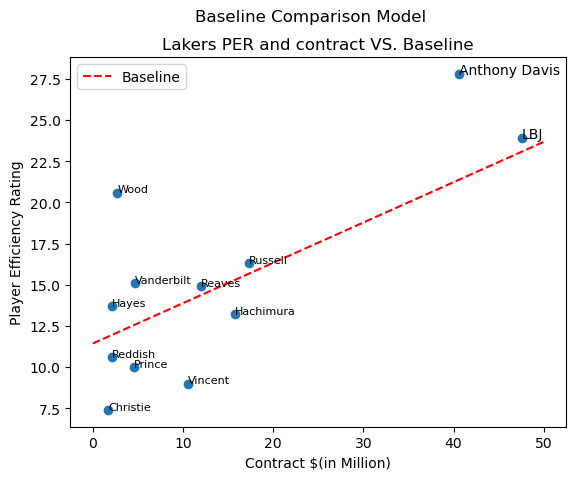

In [61]:
plt.scatter(df_lakers_tracker['2023-24'], df_lakers_tracker['PER'])

x = np.linspace(0, 50, num=50)
y = slope * x + intercept # this is the baseline

plt.plot(x, y, color='red', linestyle='--',label='Baseline')
plt.title('Lakers PER and contract VS. Baseline')
plt.suptitle('Baseline Comparison Model')
plt.xlabel('Contract $(in Million)')
plt.ylabel('Player Efficiency Rating')
plt.legend()

# add players names to the scatter plots
plt.text(47.6, 23.9, 'LBJ', fontsize=10)
plt.text(40.6, 27.8, 'Anthony Davis', fontsize=10)
plt.text(17.3, 16.3, 'Russell', fontsize=8)
plt.text(15.7, 13.2, 'Hachimura', fontsize=8)
plt.text(12.0, 14.9, 'Reaves', fontsize=8)
plt.text(10.5, 9.0, 'Vincent', fontsize=8)
plt.text(4.7, 15.1, 'Vanderbilt', fontsize=8)
plt.text(4.5, 10.0, 'Prince', fontsize=8)
plt.text(2.7, 20.6, 'Wood', fontsize=8)
plt.text(2.1, 13.7, 'Hayes', fontsize=8)
plt.text(2.1, 10.6, 'Reddish', fontsize=8)
plt.text(1.7, 7.4, 'Christie', fontsize=8)
plt.show()

### Part III: Recommendations To The GM and Contract Adjustment

In [62]:
# In Part III, the key is to leverage observations, domain knowledge and data-driven insights from Part I and II
# to offer feasible recommendations to the GM. 

### Recommendations to the GM:
### Lakers salary structure looks ok. As you can see, there are 7 players above the baseline (regression fit) including the big two. Only five players are below the baseline. Retain Lebron James (LBJ) and Anthony Davis (AD) is Laker's first priority. 
* ### LBJ is 38 years old, but his performance remains strong. I expect his PER to decrease slightly, but retaining LBJ is a no-brainer. He is the franchise player, and his contract is worth every penny until he retires. Based on the baseline comparison model, LeBron's contract appears to be fair, so there is no need to adjust it at this time.
* ### AD's PER is incredible, ranking among the league's top players. Furthermore, his contract is surprisingly underpriced. I recommend increase his contract.
* ### Chris Wood is another underpriced gem. I recommend retaining Wood and increase his contract.  
* ### Some noticeable players: Vanderbilt is underpriced, and Hachimura is overpriced. It seems like their contracts should be swapped. 
* ### Overpriced players: Hachimura, Vincent, Prince, Reddish, Christie. As bench players, their contract are relatively low, making it flexible and easy to replace them.

In [63]:
# Now let's dive into AD's contract, 
# predict AD's base stats based on historical data, and then predicted his PER based on the model.
# first, obtain AD's most recent 4 season's base data

In [64]:
# import a new df for AD's most recent 4 season's base stats
df_davis=pd.read_csv('AD.csv')
#df_davis.head()
df_davis.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [65]:
df_davis= df_davis[['MP', 'PTS', 'FG', 'FGA', 'FT', 'FTA', 
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]

In [66]:
df_davis

,MP,PTS,FG,FGA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF
0,34.4,26.1,8.9,17.7,7.2,8.5,2.3,7.0,3.2,1.5,2.3,2.5,2.5
1,32.3,21.8,8.4,17.0,4.4,5.9,1.7,6.2,3.1,1.3,1.6,2.1,1.7
2,35.1,23.2,9.3,17.4,4.4,6.1,2.7,7.2,3.1,1.2,2.3,2.1,2.4
3,34.0,25.9,9.7,17.2,6.2,7.9,3.5,9.1,2.6,1.1,2.0,2.2,2.6


In [67]:
davis_trend = np.log(df_davis/df_davis.shift(1)).dropna() # Compute AD's stats change season by season.

In [68]:
davis_adjust = davis_trend.mean() # Average change based on the historical data (most 4 seasons)

In [69]:
davis_stats_pred = df_davis.iloc[3] + davis_adjust
davis_stats_pred = np.array(davis_stats_pred).reshape((1, -1)) 
# need to reshape before input it to the model, otherwise will produce error.  
display(davis_stats_pred)

array([[33.99610132, 25.89743588,  9.72869154, 17.19044825,  6.15015609,
         7.87559887,  3.63995128,  9.18745475,  2.53078688,  0.99661502,
         1.95341269,  2.15738888,  2.61307357]])

### Deploy the Models
utilized the PER prediction model and expected_contract function

In [70]:
davis_per_pred = tree.predict(davis_stats_pred) # Use the PER model to get AD's predicted PER for the next season.

C:\Users\ljw12\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [71]:
davis_per_pred # AD's predicted PER for the next season is 27.8  

array([27.8])

In [72]:
expected_contract(27.8) # Use expected_contract function to get AD's expected_contract

66.849207689358

### Contract Adjustment 1: the expected contract for Anthony Davis is around $66.8 million, based on his predicted PER. This anticipated contract represents a 64% increase compared to his current contract. In contract discussions, I believe a 30% raise offer to AD seems quite reasonable.  

In [73]:
df_wood=pd.read_csv('Wood.csv')

df_wood= df_wood[['MP', 'PTS', 'FG', 'FGA', 'FT', 'FTA', 
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]

wood_trend = np.log(df_wood/df_wood.shift(1)).dropna()

wood_adjust = wood_trend.mean()

wood_stats_pred = df_wood.iloc[3] + wood_adjust

wood_stats_pred = np.array(wood_stats_pred).reshape((1, -1)) 

wood_per_pred = tree.predict(wood_stats_pred) 

C:\Users\ljw12\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [74]:
wood_per_pred # Wood's predicted PER for the next season is 20.6

array([20.6])

In [75]:
expected_contract(20.6) # use expected_contract function defined earlier to get Wood's expected_contract

37.43827450299258

### Contract Adjustment 2: the expected contract for Chris Wood is around $37.4 million, based on his predicted PER. This anticipated contract is nearly 14 times higher than his current contract. In contract discussions, I believe Wood's future contract should at least match that of D'Angelo Russell.

# Thanks For Watching !

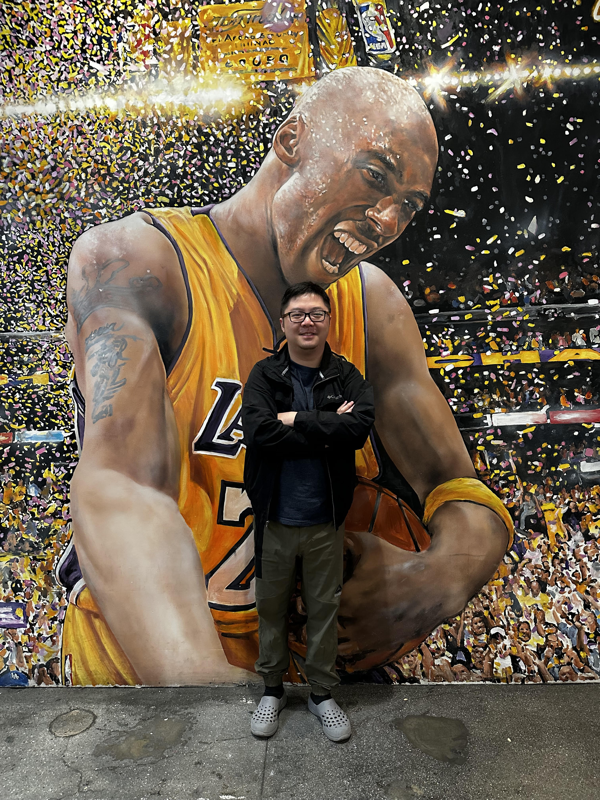

In [76]:
img1 = Image.open('kobe.jpg').resize((600,800))
display(img1)